### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

print(tienda.columns)
print(tienda2.columns)
print(tienda3.columns)
print(tienda4.columns)



Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')
Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')
Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')
Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')


**Información del challenge**

**Lo que practicarás:**
*   Cargue y manipule datos CSV con la biblioteca Pandas
*  Cree visualizaciones de datos con la biblioteca Matplotlib.
*   Analice métricas como ingresos, reseñas y rendimiento de ventas.

**Requisitos:**
*   Analizar datos de la tienda: Debes evaluar información como los ingresos, las categorías más vendidas, las reseñas de los clientes, los productos más vendidos y el envío promedio.
*   Crear gráficos para visualización:
Decide qué tipos de gráficos utilizar para presentar los resultados de forma clara y visual.
Mínimo de 3 gráficos diferentes, que pueden incluir gráficos de barras, circulares, de dispersión y otros.
*   Enviar una recomendación:
Después del análisis, escriba un texto explicando a qué tienda debería vender el Sr. João y por qué, basándose en los datos presentados.


#1. Análisis de facturación



**Ventas vs gastos de envío por tienda**: Analiza la relación entre ingresos y costos de envío por tienda.




**Cálculo del ingreso total por tienda:**
Multiplica el precio por la cantidad vendida para obtener los ingresos de cada producto.

Suma los valores de ingresos por tienda.

**Distribución de Facturación del total de ventas**

**Distribución de Facturación por método de pago**

Ingresos totales de Tienda 1: $1150880400.0
Ingresos totales de Tienda 2: $1116343500.0
Ingresos totales de Tienda 3: $1098019600.0
Ingresos totales de Tienda 4: $1038375700.0


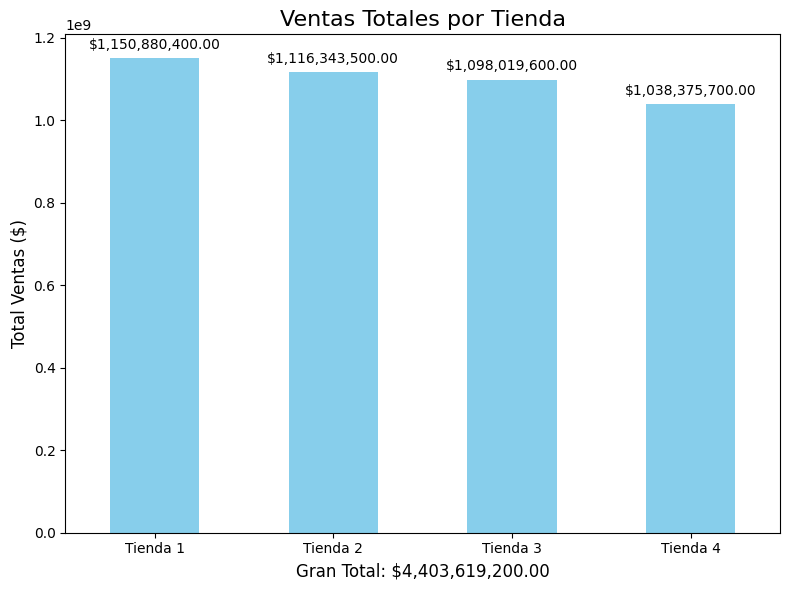

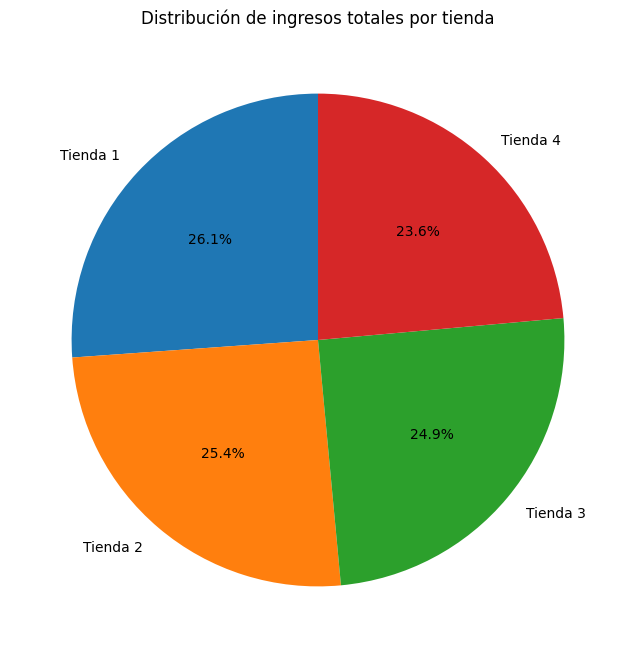

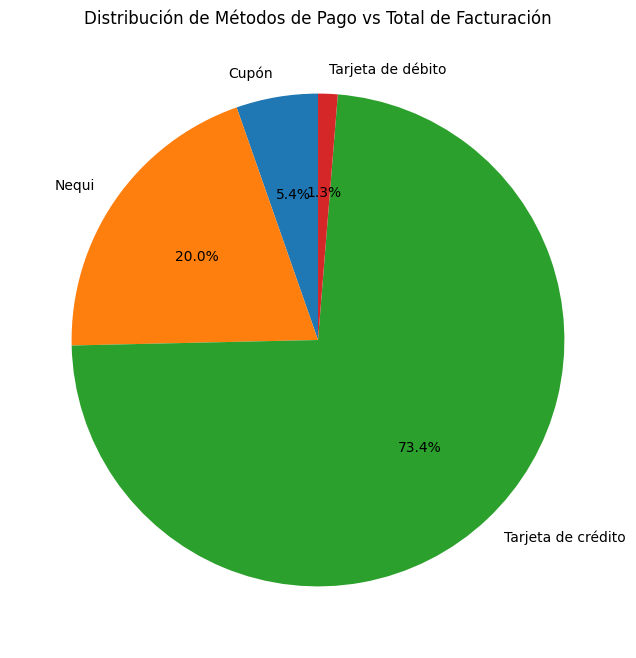

In [2]:
import matplotlib.pyplot as plt

# Calcula los ingresos totales por tienda directamente desde la columna 'Precio'
ingresos_tienda1 = tienda['Precio'].sum()
ingresos_tienda2 = tienda2['Precio'].sum()
ingresos_tienda3 = tienda3['Precio'].sum()
ingresos_tienda4 = tienda4['Precio'].sum()

# Muestra los resultados
print(f"Ingresos totales de Tienda 1: ${ingresos_tienda1}")
print(f"Ingresos totales de Tienda 2: ${ingresos_tienda2}")
print(f"Ingresos totales de Tienda 3: ${ingresos_tienda3}")
print(f"Ingresos totales de Tienda 4: ${ingresos_tienda4}")

# Crear un DataFrame con los ingresos de cada tienda
ingresos = pd.Series([ingresos_tienda1, ingresos_tienda2, ingresos_tienda3, ingresos_tienda4],
                     index=['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'])
# Calcular el total general de ventas
total_ingresos = ingresos.sum()

# Generar la gráfica de barras
fig, ax = plt.subplots(figsize=(8, 6))
barras = ingresos.plot(kind='bar', color='skyblue', ax=ax)

# Configurar etiquetas en el eje X
ax.set_xticklabels(ingresos.index, rotation=0)

# Añadir el título y etiquetas de ejes
ax.set_title('Ventas Totales por Tienda', fontsize=16)
ax.set_xlabel(f'Gran Total: ${total_ingresos:,.2f}', fontsize=12)
ax.set_ylabel('Total Ventas ($)', fontsize=12)

# Mostrar el total de ventas encima de cada barra
for i, valor in enumerate(ingresos):
    ax.text(i, valor + max(ingresos) * 0.02, f'${valor:,.2f}', ha='center', fontsize=10, color='black')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

# Generar la gráfica de pastel de distribución de facturación
ingresos.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(8, 8))
plt.title('Distribución de ingresos totales por tienda')
plt.ylabel('')  # Elimina la etiqueta del eje Y para mayor claridad
plt.show()

# Combinar los datos de todas las tiendas en un DataFrame único
datos_combinados = pd.concat([tienda, tienda2, tienda3, tienda4])


# Agrupar por método de pago y sumar la facturación total
facturacion_por_metodo = datos_combinados.groupby('Método de pago')['Precio'].sum()


# Crear la gráfica circular
facturacion_por_metodo.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(8, 8))
plt.title('Distribución de Métodos de Pago vs Total de Facturación')
plt.ylabel('')  # Eliminar la etiqueta del eje Y para mayor claridad
plt.show()




# 2. Ventas por categoría


**Total de Ventas por categoría por tienda**(gráfica en columnas):Muestra la cantidad de ítems vendidos en cada categoría por tienda.

**Total de Ventas por categoría (gráfica en columnas)**: Representa el número total de ítems vendidos por categoría, independientemente de la tienda.


**Cálculo de productos vendidos por categoría por tienda** El proceso implica agrupar los datos por la columna Categoría del Producto en cada tienda y contar el número de filas asociadas a cada categoría (ya que cada fila representa una venta de un ítem).

Tienda 1:
Categoría del Producto
Artículos para el hogar    171
Deportes y diversión       284
Electrodomésticos          312
Electrónicos               448
Instrumentos musicales     182
Juguetes                   324
Libros                     173
Muebles                    465
dtype: int64

Tienda 2:
Categoría del Producto
Artículos para el hogar    181
Deportes y diversión       275
Electrodomésticos          305
Electrónicos               422
Instrumentos musicales     224
Juguetes                   313
Libros                     197
Muebles                    442
dtype: int64

Tienda 3:
Categoría del Producto
Artículos para el hogar    177
Deportes y diversión       277
Electrodomésticos          278
Electrónicos               451
Instrumentos musicales     177
Juguetes                   315
Libros                     185
Muebles                    499
dtype: int64

Tienda 4:
Categoría del Producto
Artículos para el hogar    201
Deportes y diversión       277
Electrodomésticos   

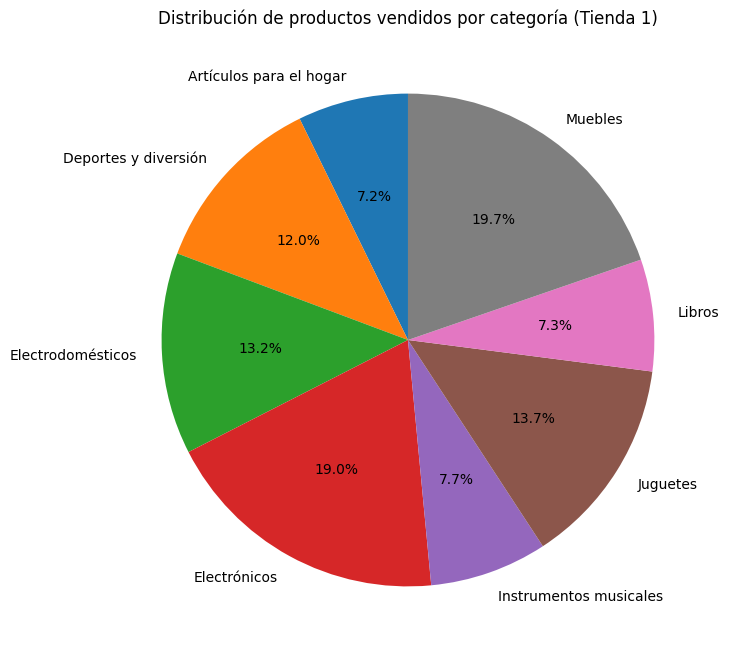

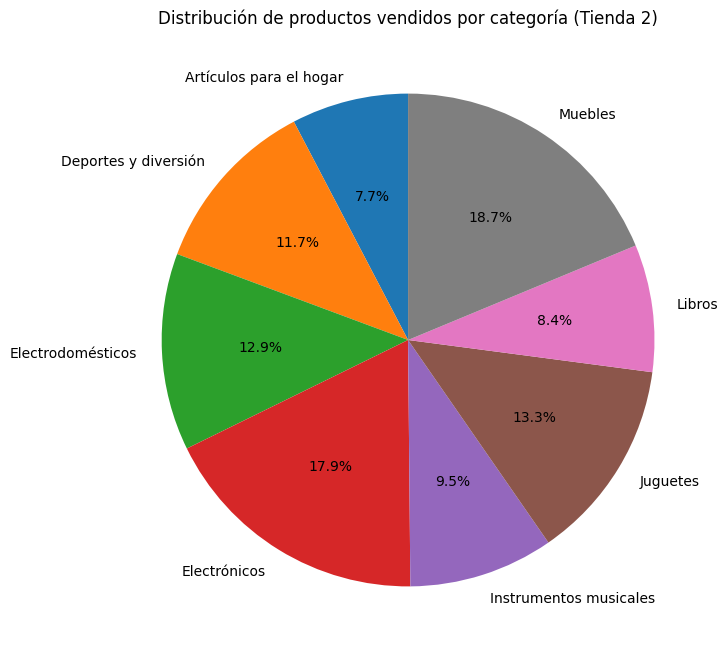

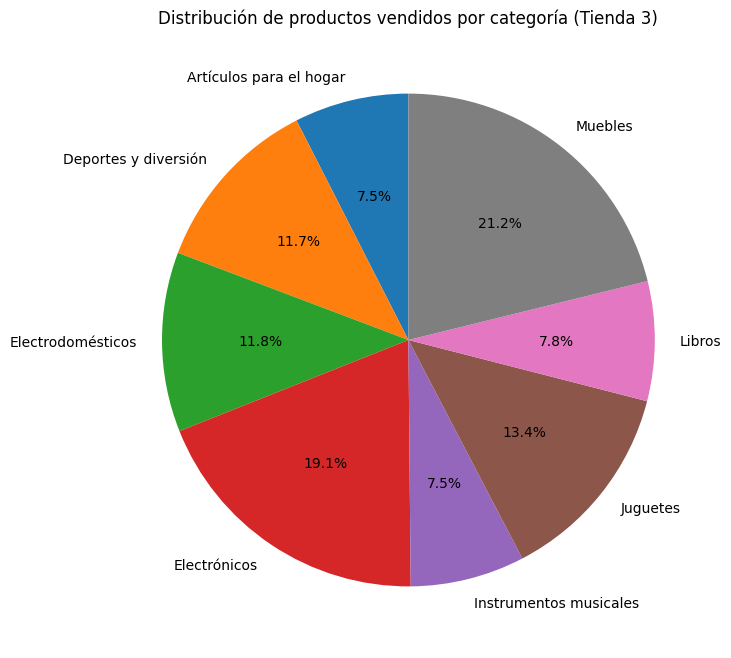

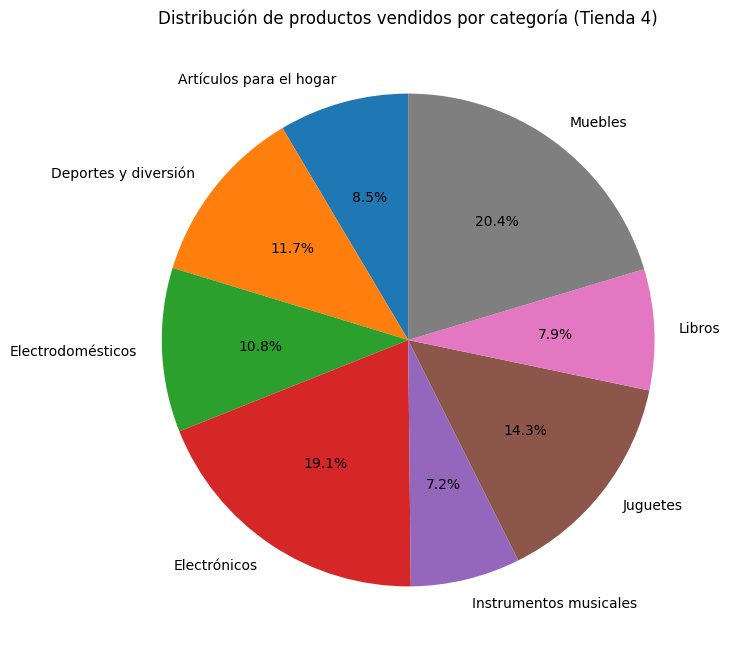

Categoría del Producto
Artículos para el hogar     730
Deportes y diversión       1113
Electrodomésticos          1149
Electrónicos               1772
Instrumentos musicales      753
Juguetes                   1290
Libros                      742
Muebles                    1886
dtype: int64


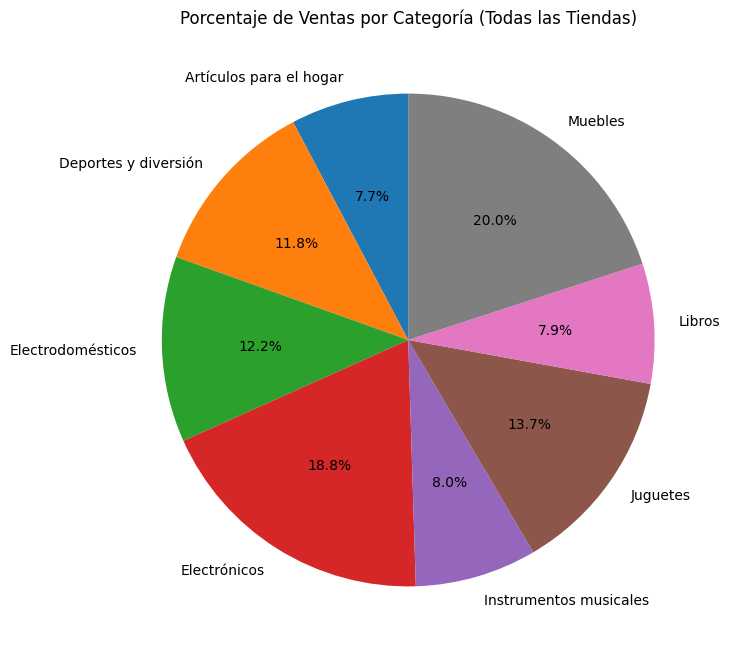

In [5]:
import matplotlib.pyplot as plt


# Agrupar por categoría y contar las filas en cada tienda
productos_por_categoria_tienda1 = tienda.groupby('Categoría del Producto').size()
productos_por_categoria_tienda2 = tienda2.groupby('Categoría del Producto').size()
productos_por_categoria_tienda3 = tienda3.groupby('Categoría del Producto').size()
productos_por_categoria_tienda4 = tienda4.groupby('Categoría del Producto').size()

# Mostrar los resultados
print("Tienda 1:")
print(productos_por_categoria_tienda1)
print("\nTienda 2:")
print(productos_por_categoria_tienda2)
print("\nTienda 3:")
print(productos_por_categoria_tienda3)
print("\nTienda 4:")
print(productos_por_categoria_tienda4)

# Visualizar para tienda 1
productos_por_categoria_tienda1.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=90)
plt.title('Distribución de productos vendidos por categoría (Tienda 1)')
plt.ylabel('')  # Elimina la etiqueta del eje Y para mayor claridad
plt.show()


# Visualizar para tienda 2
productos_por_categoria_tienda2.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=90)
plt.title('Distribución de productos vendidos por categoría (Tienda 2)')
plt.ylabel('')  # Elimina la etiqueta del eje Y para mayor claridad
plt.show()


# Visualizar para tienda 3
productos_por_categoria_tienda3.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=90)
plt.title('Distribución de productos vendidos por categoría (Tienda 3)')
plt.ylabel('')  # Elimina la etiqueta del eje Y para mayor claridad
plt.show()


# Visualizar para tienda 4
productos_por_categoria_tienda4.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), startangle=90)
plt.title('Distribución de productos vendidos por categoría (Tienda 4)')
plt.ylabel('')  # Elimina la etiqueta del eje Y para mayor claridad
plt.show()

# Sumar las ventas de las categorías de todas las tiendas
ventas_por_categoria_general = productos_por_categoria_tienda1.add(productos_por_categoria_tienda2, fill_value=0) \
                                                              .add(productos_por_categoria_tienda3, fill_value=0) \
                                                              .add(productos_por_categoria_tienda4, fill_value=0)

# Verificar los datos agrupados
print(ventas_por_categoria_general)

# Crear la gráfica circular
ventas_por_categoria_general.plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(8, 8))
plt.title('Porcentaje de Ventas por Categoría (Todas las Tiendas)')
plt.ylabel('')  # Eliminar la etiqueta del eje Y para mayor claridad
plt.show()


# 3. Calificación promedio de la tienda


**Valoración media por tienda:** En este paso, debes calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

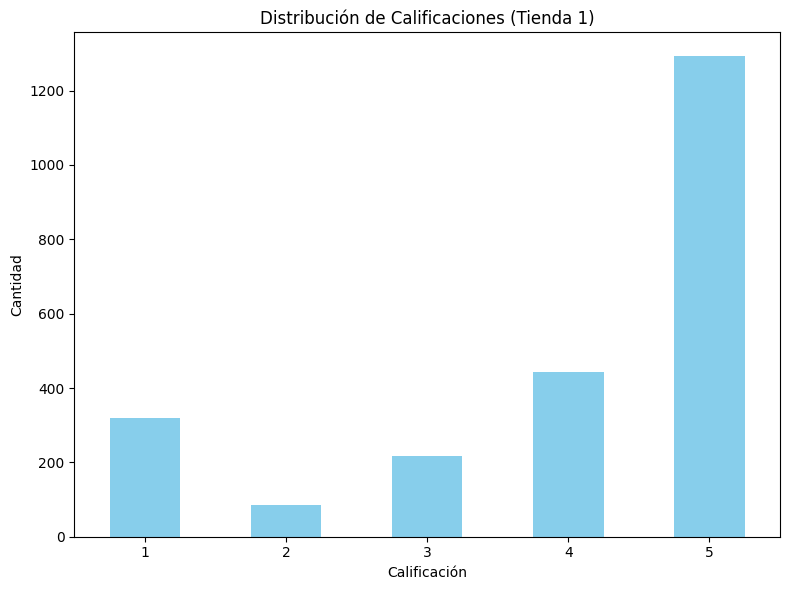

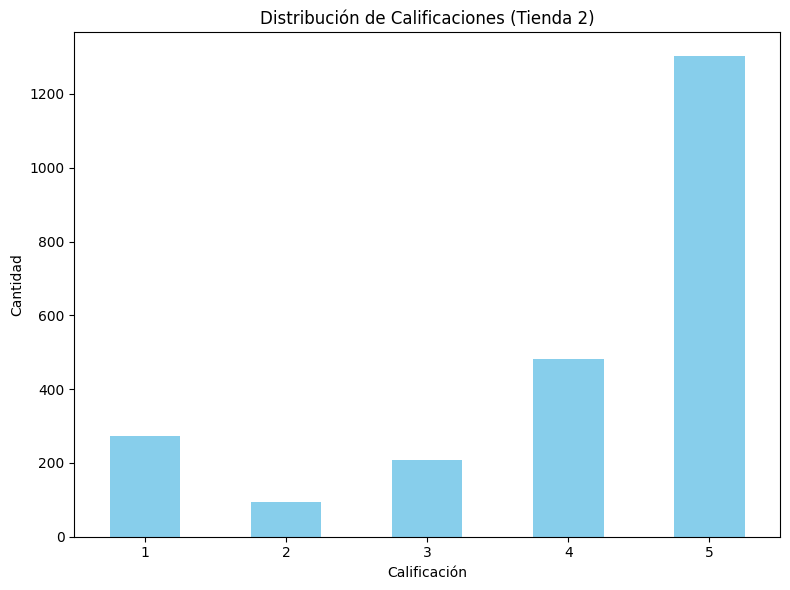

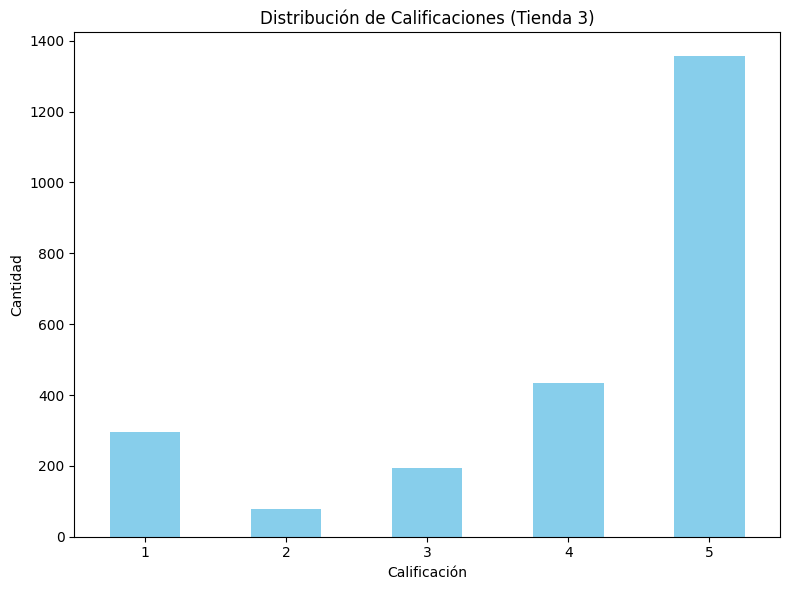

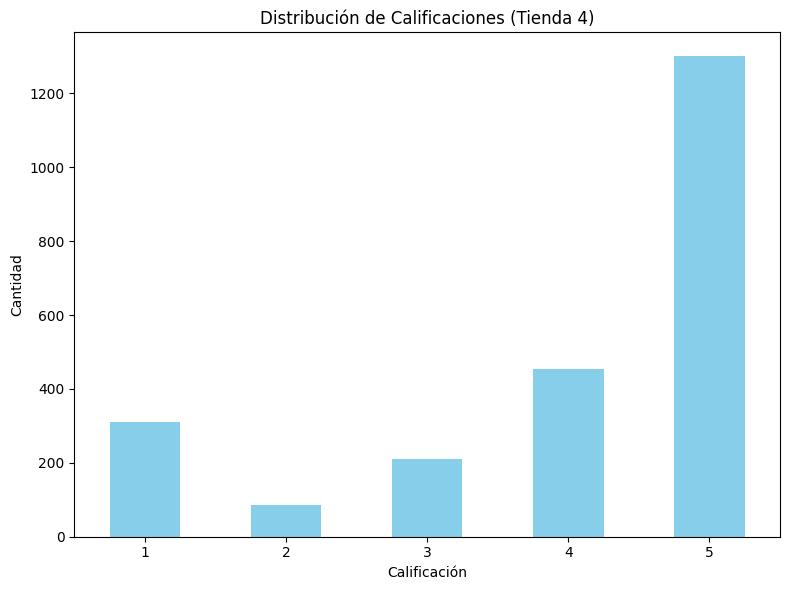

Valoración media de Tienda 1: 3.98
Valoración media de Tienda 2: 4.04
Valoración media de Tienda 3: 4.05
Valoración media de Tienda 4: 4.00


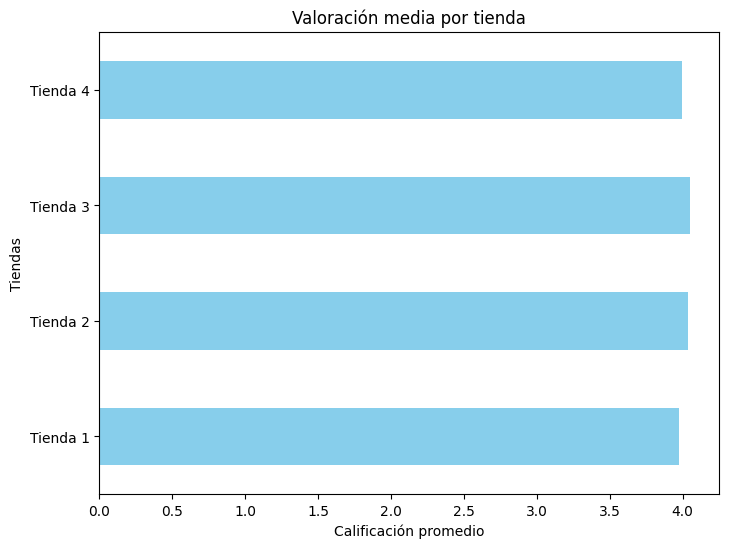

In [6]:
import matplotlib.pyplot as plt

# Crear un diccionario para almacenar las tiendas y sus datos
tiendas = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

# Iterar por cada tienda para calcular y graficar la distribución de calificaciones
for nombre_tienda, datos in tiendas.items():
    # Contar las calificaciones (frecuencia de 1, 2, 3, 4)
    distribucion_calificaciones = datos['Calificación'].value_counts().sort_index()

    # Crear el gráfico de barras
    distribucion_calificaciones.plot(kind='bar', color='skyblue', figsize=(8, 6))
    plt.title(f'Distribución de Calificaciones ({nombre_tienda})')
    plt.xlabel('Calificación')
    plt.ylabel('Cantidad')
    plt.xticks(rotation=0)

    # Mostrar la gráfica
    plt.tight_layout()
    plt.show()


# Calcular la valoración media por tienda
valoracion_media_tienda1 = tienda['Calificación'].mean()
valoracion_media_tienda2 = tienda2['Calificación'].mean()
valoracion_media_tienda3 = tienda3['Calificación'].mean()
valoracion_media_tienda4 = tienda4['Calificación'].mean()

# Mostrar los resultados
print(f"Valoración media de Tienda 1: {valoracion_media_tienda1:.2f}")
print(f"Valoración media de Tienda 2: {valoracion_media_tienda2:.2f}")
print(f"Valoración media de Tienda 3: {valoracion_media_tienda3:.2f}")
print(f"Valoración media de Tienda 4: {valoracion_media_tienda4:.2f}")

import matplotlib.pyplot as plt

# Crear un DataFrame para las valoraciones
valoraciones = pd.Series(
    [valoracion_media_tienda1, valoracion_media_tienda2, valoracion_media_tienda3, valoracion_media_tienda4],
    index=['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
)

# Gráfico de barras horizontales
valoraciones.plot(kind='barh', color='skyblue', figsize=(8, 6))
plt.title('Valoración media por tienda')
plt.xlabel('Calificación promedio')
plt.ylabel('Tiendas')
plt.show()

# 4. Productos más y menos vendidos

**Productos mas vendidos y menos vendidos:** En este paso, debes identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.

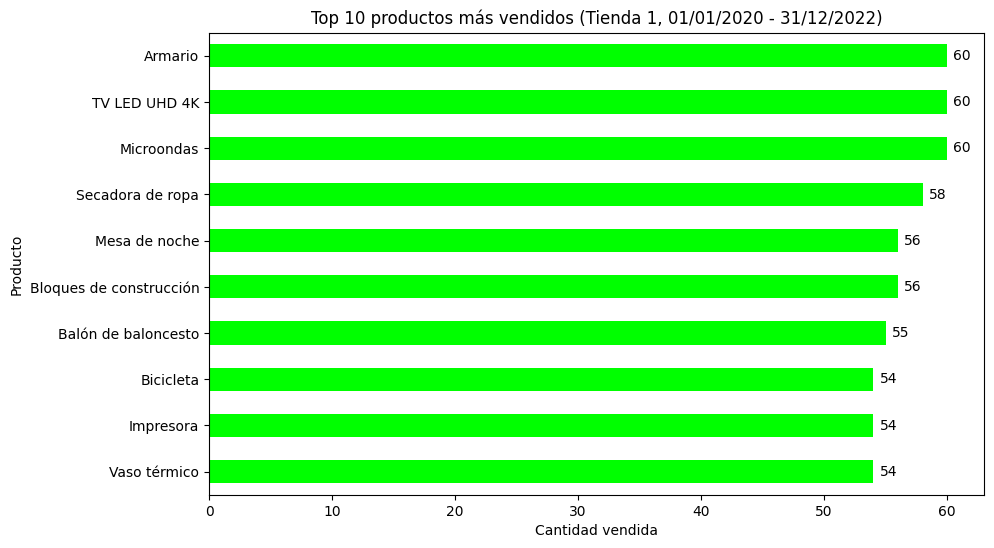

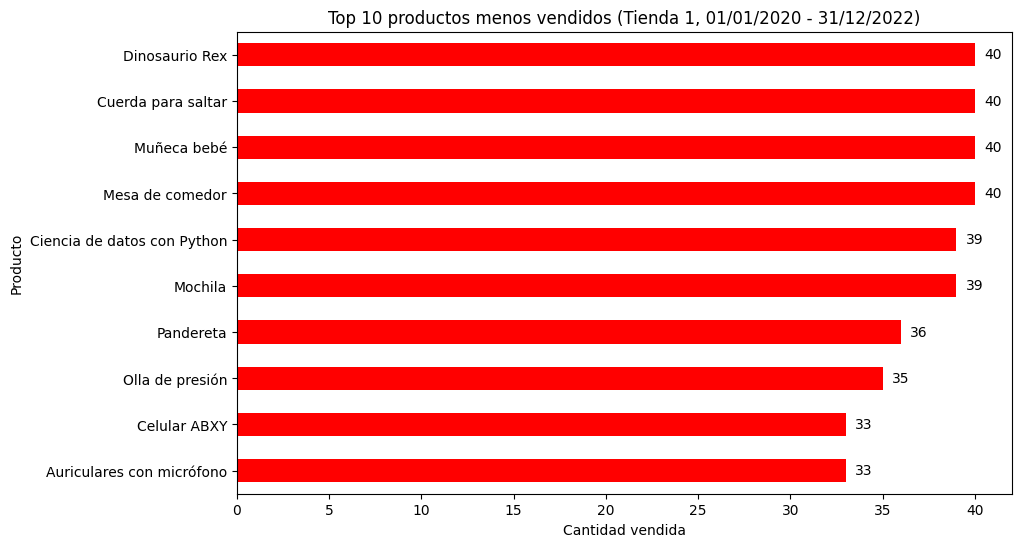

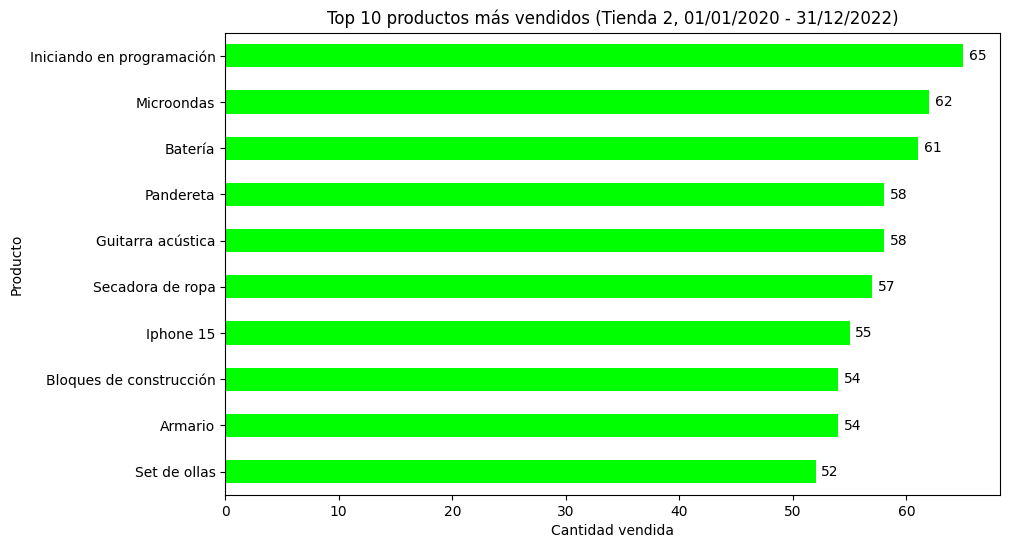

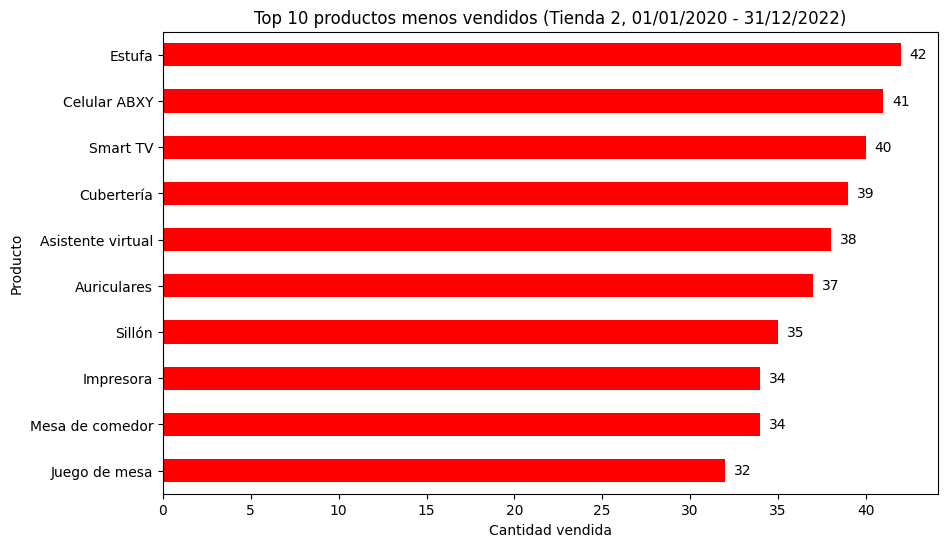

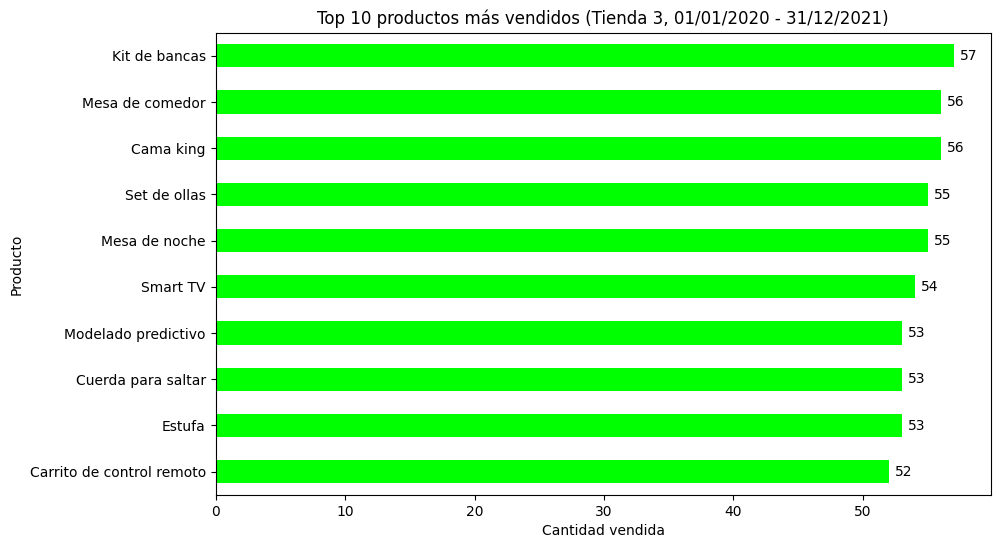

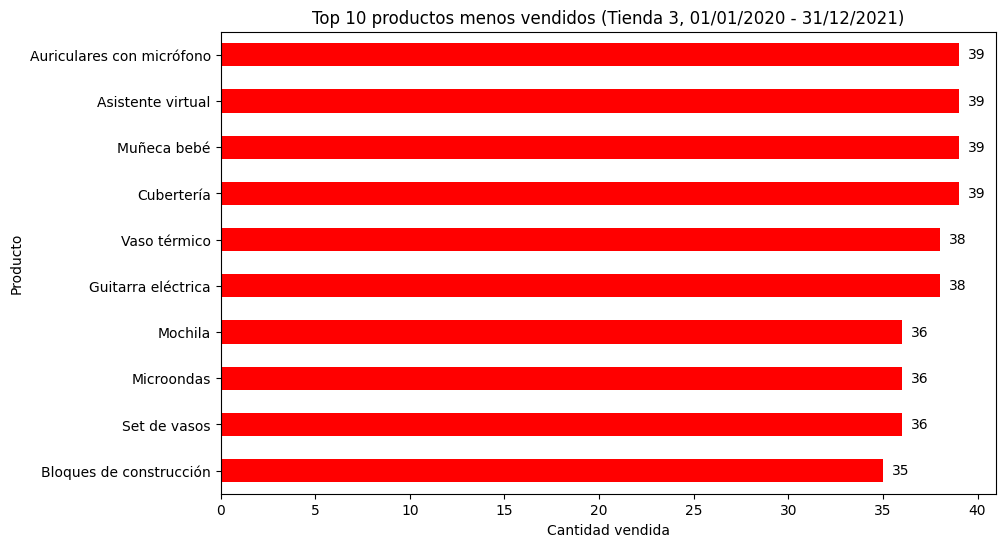

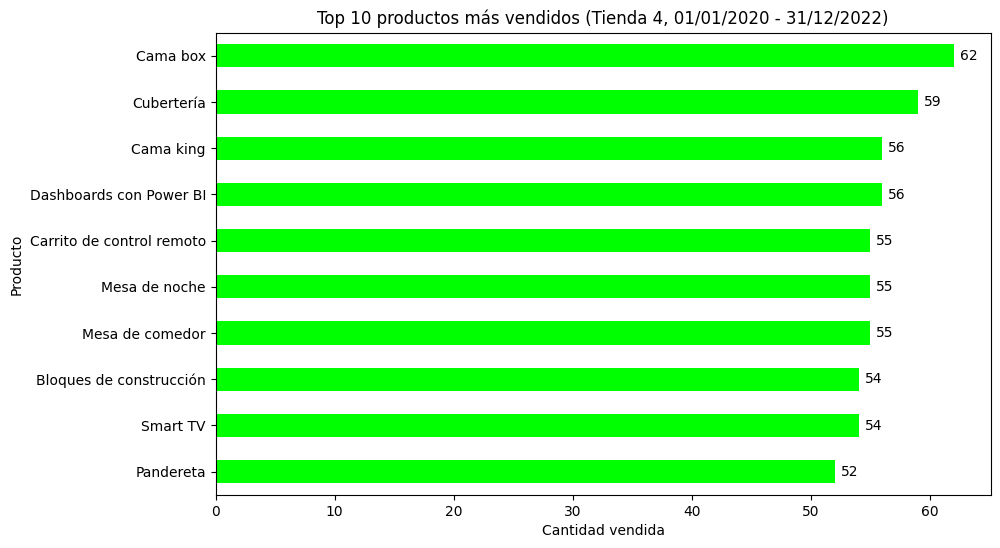

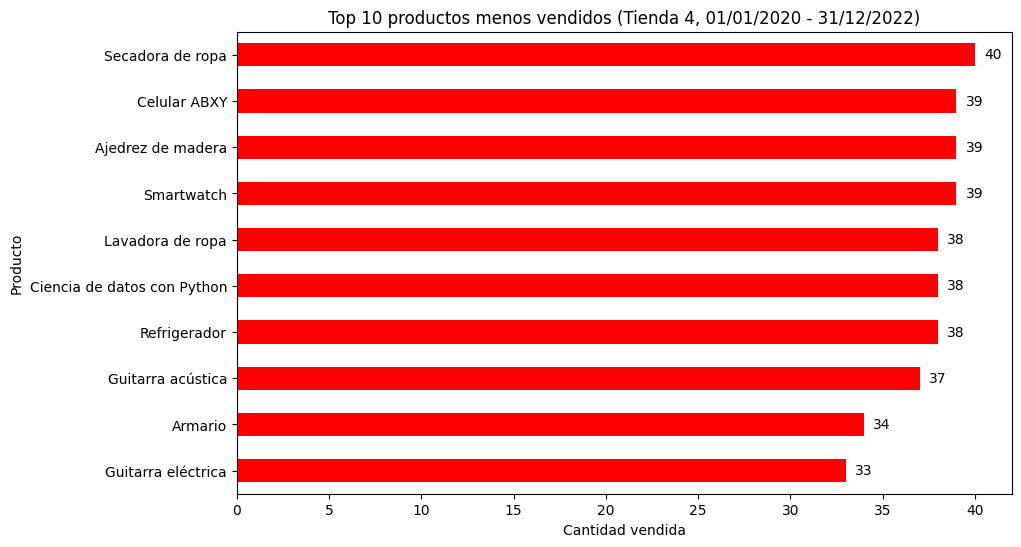

In [4]:
import matplotlib.pyplot as plt

# Crear un diccionario para las tiendas y sus datos
tiendas = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

# Iterar para generar gráficos
for nombre_tienda, datos in tiendas.items():
    # Agrupar y ordenar por cantidad de ítems vendidos
    productos_vendidos = datos.groupby('Producto').size().sort_values(ascending=False)

    # Crear el rango de tiempo dinámico
    rango_tiempo = f"{datos['Fecha de Compra'].min()} - {datos['Fecha de Compra'].max()}"  # Ajusta si la columna es diferente

    # Generar el gráfico para los productos más vendidos
    fig, ax = plt.subplots(figsize=(10, 6))
    productos_vendidos.head(10).plot(kind='barh', color='lime', ax=ax)
    ax.set_title(f"Top 10 productos más vendidos ({nombre_tienda}, {rango_tiempo})")
    ax.set_xlabel('Cantidad vendida')
    ax.set_ylabel('Producto')
    ax.invert_yaxis()  # Productos más vendidos en la parte superior

    # Agregar etiquetas al lado de las barras
    for i, valor in enumerate(productos_vendidos.head(10)):
        ax.text(valor + 0.5, i, str(valor), va='center')  # Etiquetas con cantidad vendida

    plt.show()

    # Generar el gráfico para los productos menos vendidos
    fig, ax = plt.subplots(figsize=(10, 6))
    productos_vendidos.tail(10).plot(kind='barh', color='red', ax=ax)
    ax.set_title(f"Top 10 productos menos vendidos ({nombre_tienda}, {rango_tiempo})")
    ax.set_xlabel('Cantidad vendida')
    ax.set_ylabel('Producto')
    ax.invert_yaxis()  # Productos menos vendidos en la parte superior

    # Agregar etiquetas al lado de las barras
    for i, valor in enumerate(productos_vendidos.tail(10)):
        ax.text(valor + 0.5, i, str(valor), va='center')

    plt.show()

# 5. Envío promedio por tienda

**Valor del envío promedio por tienda:**
En este paso, debes calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.

Costo de envío promedio de Tienda 1: $26018.61
Costo de envío promedio de Tienda 2: $25216.24
Costo de envío promedio de Tienda 3: $24805.68
Costo de envío promedio de Tienda 4: $23459.46


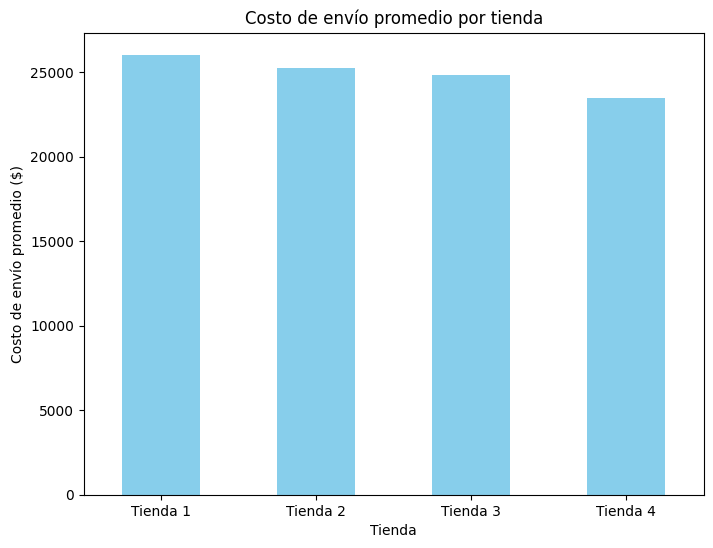

In [7]:
# Calcular el costo de envío promedio por tienda
envio_promedio_tienda1 = tienda['Costo de envío'].mean()
envio_promedio_tienda2 = tienda2['Costo de envío'].mean()
envio_promedio_tienda3 = tienda3['Costo de envío'].mean()
envio_promedio_tienda4 = tienda4['Costo de envío'].mean()

# Mostrar los resultados
print(f"Costo de envío promedio de Tienda 1: ${envio_promedio_tienda1:.2f}")
print(f"Costo de envío promedio de Tienda 2: ${envio_promedio_tienda2:.2f}")
print(f"Costo de envío promedio de Tienda 3: ${envio_promedio_tienda3:.2f}")
print(f"Costo de envío promedio de Tienda 4: ${envio_promedio_tienda4:.2f}")

import matplotlib.pyplot as plt

# Crear un DataFrame con los costos de envío promedio
envio_promedio = pd.Series(
    [envio_promedio_tienda1, envio_promedio_tienda2, envio_promedio_tienda3, envio_promedio_tienda4],
    index=['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
)

# Generar el gráfico de barras
envio_promedio.plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.title('Costo de envío promedio por tienda')
plt.xlabel('Tienda')
plt.ylabel('Costo de envío promedio ($)')
plt.xticks(rotation=0)
plt.show()

# 6. Información Adicional